# Notebook for my crvUSD charts for the anniversary article

Read the data in, turn it into a pandas dataframe, the csv is in this repo as well, so you can see how the data looks

In [1]:
import pandas as pd

csv_file_path = 'crvusd-stats.csv'
df = pd.read_csv(csv_file_path, parse_dates=['date'])
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

Calculate moving averages, so we can see changes in borrow rates over longer periods

In [2]:
window_sizes = [7,14,30,60,90]
for window_size in window_sizes:
    df[f'aave_avg_rate_MA{window_size}'] = df['aave_avg_rate'].rolling(window=window_size, min_periods=1).mean()
    df[f'binance_avg_rate_MA{window_size}'] = df['binance_avg_rate'].rolling(window=window_size, min_periods=1).mean()
    df[f'crvusd_rate_MA{window_size}'] = df['crvusd_rate'].rolling(window=window_size, min_periods=1).mean()

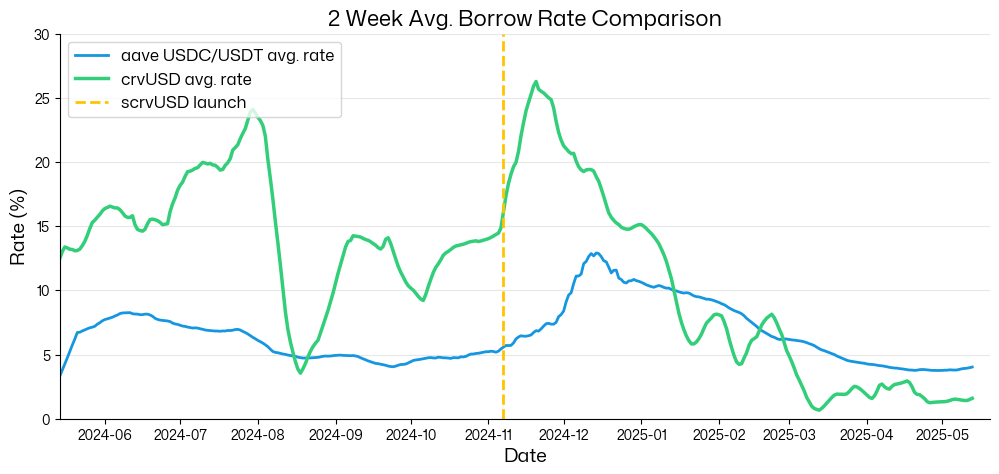

In [3]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager, rcParams

# All Curve docs use the Mona Sans font, so use it here
font_manager.fontManager.addfont("MonaSans-Regular.ttf")
monasans_font = font_manager.FontProperties(fname="MonaSans-Regular.ttf")
rcParams['font.sans-serif'] = [monasans_font.get_name()]

# Create the plot
plt.figure(figsize=(12, 5))

# plot the chosen MA (14 days)
chosen_ma = 14
plt.plot(df['date'], df[f'aave_avg_rate_MA{chosen_ma}']*100, 
        label='aave USDC/USDT avg. rate', color='#1596e0', linewidth=2)
plt.plot(df['date'], df[f'crvusd_rate_MA{chosen_ma}']*100, 
        label='crvUSD avg. rate', color='#32CE79', linewidth=2.5)

# Vertical line for scrvUSD launch
scrvusd_date = datetime(2024, 11, 7, 0, 0, 0)
plt.axvline(x=scrvusd_date, color='#FFC400', linestyle='--', linewidth=2, label='scrvUSD launch')

# Labels and axes changes

plt.title('2 Week Avg. Borrow Rate Comparison', fontsize=16)
plt.ylabel('Rate (%)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(fontsize=12, loc='upper left')

min_date = datetime(2024, 5, 14, 0, 0, 0)
max_date = datetime(2025, 5, 20, 0, 0, 0)
plt.xlim(min_date, max_date)
plt.ylim(0, 30)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

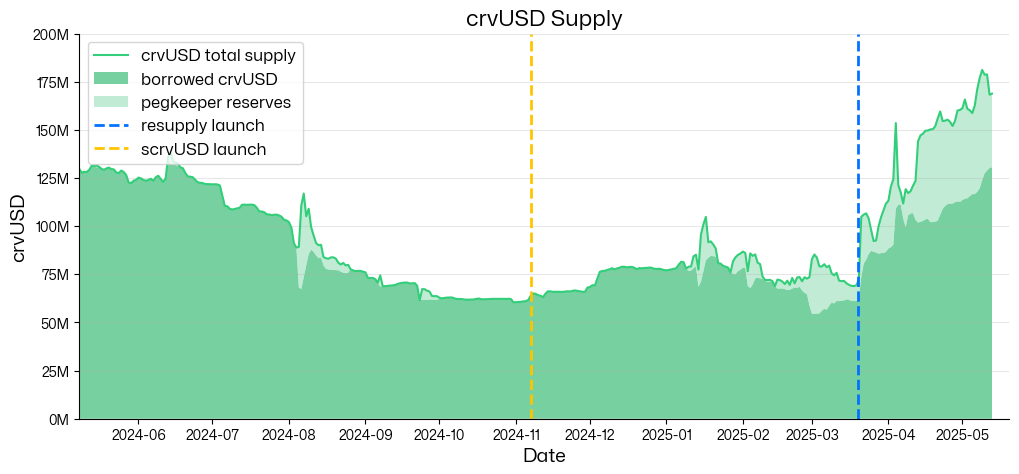

In [4]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager, rcParams
import matplotlib.ticker as ticker

# All Curve docs use the Mona Sans font, so use it here
font_manager.fontManager.addfont("MonaSans-Regular.ttf")
monasans_font = font_manager.FontProperties(fname="MonaSans-Regular.ttf")
rcParams['font.sans-serif'] = [monasans_font.get_name()]

plt.figure(figsize=(12, 5))

# Plot total supply (main line)
plt.plot(df['date'], df['crvusd_total_supply'] / 1e6, label='crvUSD total supply', linewidth=1.5, color='#32CE79')

# Shade crvusd_debt from y=0 to crvusd_debt
plt.fill_between(df['date'], 0, df['crvusd_debt'] / 1e6, 
                 color='#55c588', alpha=0.8, label='borrowed crvUSD', edgecolor='none')

# Shade pegkeeper_debt on top of crvusd_debt
plt.fill_between(df['date'], df['crvusd_debt'] / 1e6, df['crvusd_total_supply'] / 1e6, 
                 color='#98dfb8', alpha=0.6, label='pegkeeper reserves', edgecolor='none')

# Vertical line for resupply
resupply_date = datetime(2025, 3, 19, 12, 0, 0)
plt.axvline(x=resupply_date, color='#0372FF', linestyle='--', linewidth=2, label='resupply launch')

# Vertical line for scrvUSD
scrvusd_date = datetime(2024, 11, 7, 0, 0, 0)
plt.axvline(x=scrvusd_date, color='#FFC400', linestyle='--', linewidth=2, label='scrvUSD launch')

plt.title('crvUSD Supply', fontsize=16)
plt.ylabel('crvUSD', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(fontsize=12, loc='upper left')

# set x and y limits
min_date = datetime(2024, 5, 8, 0, 0, 0)
max_date = datetime(2025, 5, 20, 0, 0, 0)
plt.xlim(min_date, max_date)
plt.ylim(0, 200) # 0 to 200 million crvUSD


ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}M'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

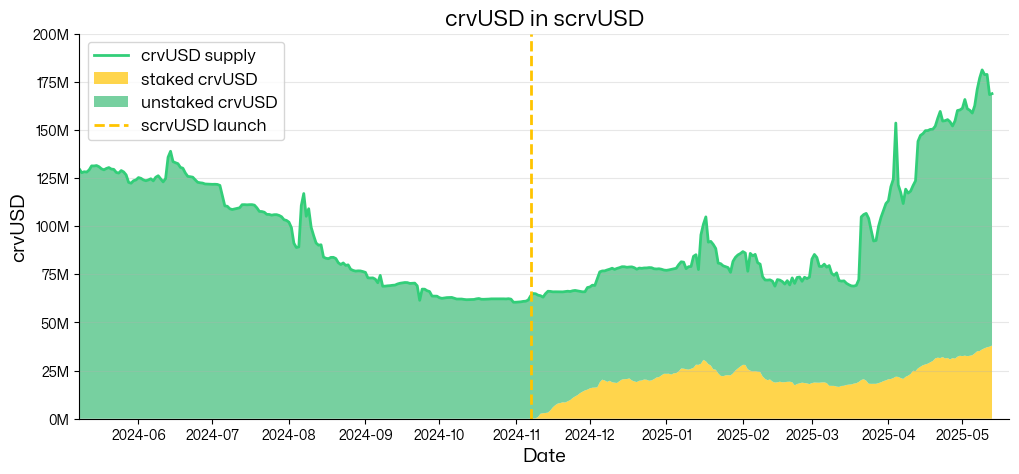

In [5]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager, rcParams
import matplotlib.ticker as ticker

# All Curve docs use the Mona Sans font, so use it here
font_manager.fontManager.addfont("MonaSans-Regular.ttf")
monasans_font = font_manager.FontProperties(fname="MonaSans-Regular.ttf")
rcParams['font.sans-serif'] = [monasans_font.get_name()]

plt.figure(figsize=(12, 5))

# Plot total supply (main line)
plt.plot(df['date'], df['crvusd_total_supply'] / 1e6, label='crvUSD supply', linewidth=2, color='#32CE79')

# Shade pegkeeper_debt on top of crvusd_debt
plt.fill_between(df['date'], 0, df['scrvusd_crvusd_supply'] / 1e6, 
                 color='#FFC400', alpha=0.7, label='staked crvUSD', edgecolor='none')

# Shade crvusd_debt from y=0 to crvusd_debt
plt.fill_between(df['date'], df['scrvusd_crvusd_supply'] / 1e6, df['crvusd_total_supply'] / 1e6, 
                 color='#55c588', alpha=0.8, label='unstaked crvUSD', edgecolor='none')


# Vertical line for scrvUSD launch
scrvusd_date = datetime(2024, 11, 7, 0, 0, 0)
plt.axvline(x=scrvusd_date, color='#FFC400', linestyle='--', linewidth=2, label='scrvUSD launch')

# Labels and axes changes
plt.title('crvUSD in scrvUSD', fontsize=16)
plt.ylabel('crvUSD', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(fontsize=12, loc='upper left')

# set x and y limits
min_date = datetime(2024, 5, 8, 0, 0, 0)
max_date = datetime(2025, 5, 20, 0, 0, 0)
plt.xlim(min_date, max_date)
plt.ylim(0, 200) # 0 to 200 million crvUSD

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}M'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

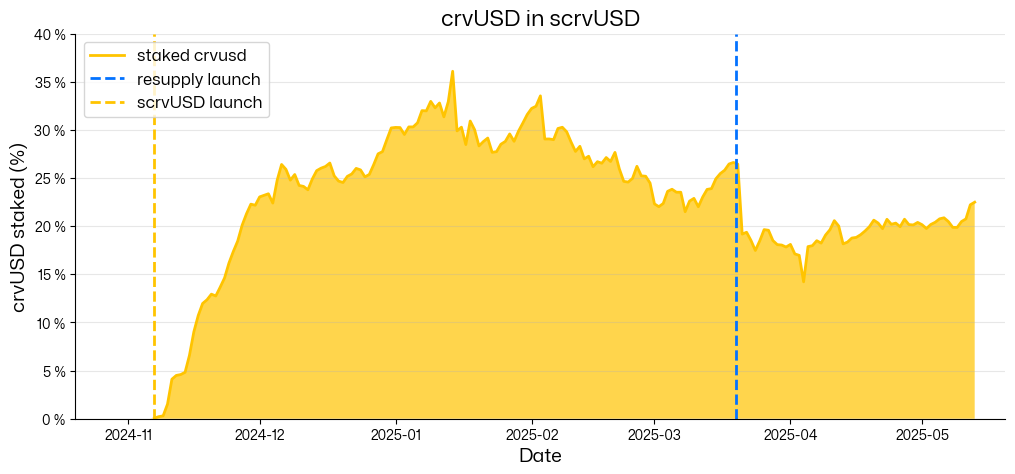

In [6]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager, rcParams
import matplotlib.ticker as ticker

# All Curve docs use the Mona Sans font, so use it here
font_manager.fontManager.addfont("MonaSans-Regular.ttf")
monasans_font = font_manager.FontProperties(fname="MonaSans-Regular.ttf")
rcParams['font.sans-serif'] = [monasans_font.get_name()]

plt.figure(figsize=(12, 5))

# Calculate the percentage of crvUSD staked in scrvUSD
df['crvusd_staked_percentage'] = df['scrvusd_crvusd_supply'] / df['crvusd_total_supply'] * 100
mask = (df['date'] >= datetime(2024, 11, 7, 0, 0, 0)) & (df['date'] <= datetime(2025, 5, 13, 0, 0, 0))
df_filtered = df[mask]

# Plot the crvUSD staked percentage
plt.plot(df_filtered['date'], df_filtered['crvusd_staked_percentage'], label='staked crvusd', linewidth=2, color='#FFC400')

# Shade pegkeeper_debt on top of crvusd_debt
plt.fill_between(df['date'], 0, df['crvusd_staked_percentage'], 
                 color='#FFC400', alpha=0.7, edgecolor='none')

# Vertical line for resupply launch
resupply_date = datetime(2025, 3, 19, 12, 0, 0)
plt.axvline(x=resupply_date, color='#0372FF', linestyle='--', linewidth=2, label='resupply launch')

# Vertical line for scrvUSD launch
scrvusd_date = datetime(2024, 11, 7, 0, 0, 0)
plt.axvline(x=scrvusd_date, color='#FFC400', linestyle='--', linewidth=2, label='scrvUSD launch')

# Labels and axes changes
plt.title('crvUSD in scrvUSD', fontsize=16)
plt.ylabel('crvUSD staked (%)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(fontsize=12, loc='upper left')

# set x and y limits
min_date = datetime(2024, 10, 20, 0, 0, 0)
max_date = datetime(2025, 5, 20, 0, 0, 0)
plt.xlim(min_date, max_date)
plt.ylim(0, 40)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f} %'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

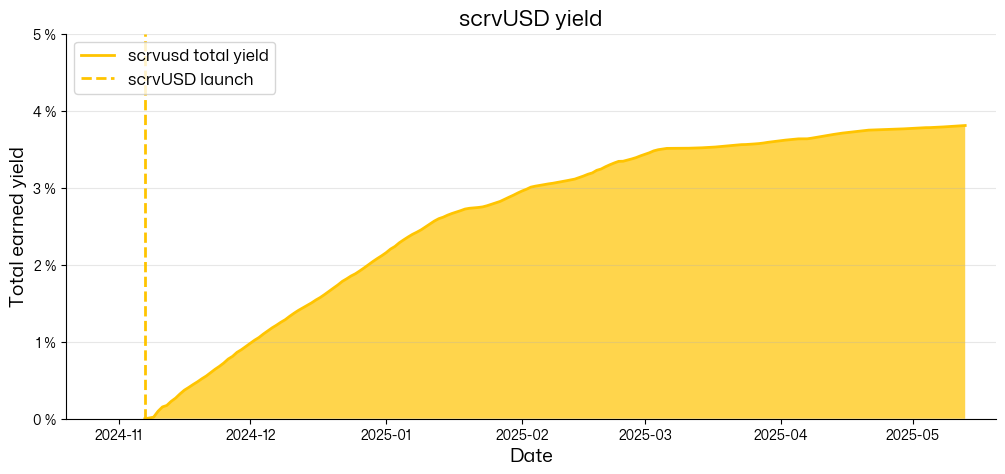

In [7]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager, rcParams
import matplotlib.ticker as ticker

# All Curve docs use the Mona Sans font, so use it here
font_manager.fontManager.addfont("MonaSans-Regular.ttf")
monasans_font = font_manager.FontProperties(fname="MonaSans-Regular.ttf")
rcParams['font.sans-serif'] = [monasans_font.get_name()]

plt.figure(figsize=(12, 5))

# Plot CIRCULATING supply (main line)
df['scrvusd_earned_apy'] = (df['scrvusd_virtual_price'] - 1) * 100
mask = (df['date'] >= datetime(2024, 11, 7, 0, 0, 0)) & (df['date'] <= datetime(2025, 5, 13, 0, 0, 0))
df_filtered = df[mask]

# Plot the scrvusd_earned_apy line
plt.plot(df_filtered['date'], df_filtered['scrvusd_earned_apy']-df_filtered['scrvusd_earned_apy'].min(), label='scrvusd total yield', linewidth=2, color='#FFC400')

# Shade from 0 to scrvusd_earned_apy
plt.fill_between(df_filtered['date'], 0, df_filtered['scrvusd_earned_apy']-df_filtered['scrvusd_earned_apy'].min(), 
                 color='#FFC400', alpha=0.7, edgecolor='none')

# Vertical line for scrvUSD launch
scrvusd_date = datetime(2024, 11, 7, 0, 0, 0)
plt.axvline(x=scrvusd_date, color='#FFC400', linestyle='--', linewidth=2, label='scrvUSD launch')

# Labels and axes changes
plt.title('scrvUSD yield', fontsize=16)
plt.ylabel('Total earned yield', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(fontsize=12, loc='upper left')

# set x and y limits
min_date = datetime(2024, 10, 20, 0, 0, 0)
max_date = datetime(2025, 5, 20, 0, 0, 0)
plt.xlim(min_date, max_date)
plt.ylim(0, 5)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f} %'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

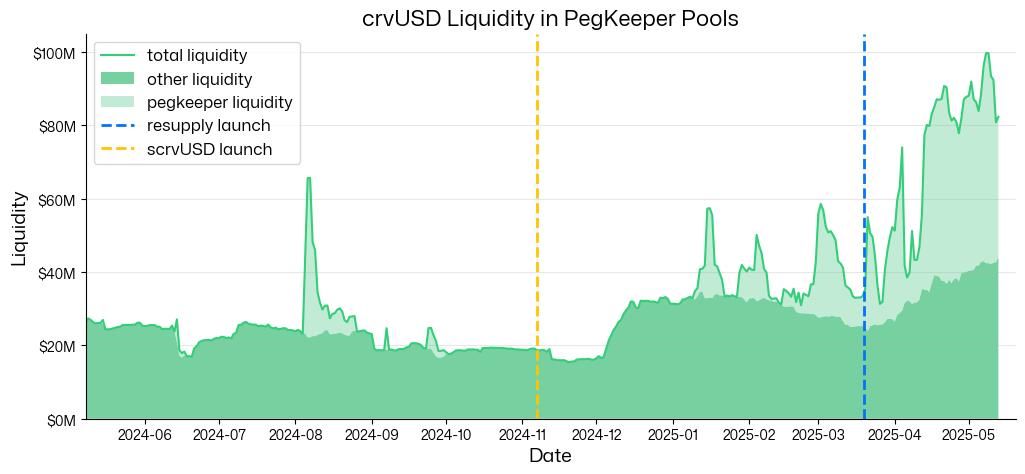

In [8]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager, rcParams
import matplotlib.ticker as ticker

# All Curve docs use the Mona Sans font, so use it here
font_manager.fontManager.addfont("MonaSans-Regular.ttf")
monasans_font = font_manager.FontProperties(fname="MonaSans-Regular.ttf")
rcParams['font.sans-serif'] = [monasans_font.get_name()]

plt.figure(figsize=(12, 5))

# Plot pegkeeper_pool_liquidity (main line)
plt.plot(df['date'], df['pegkeeper_pool_liquidity'] / 1e6, label='total liquidity', linewidth=1.5, color='#32CE79')

# Shade from 0 to pool liquidity without pegkeeper debt
plt.fill_between(df['date'], 0, df['pegkeeper_pool_liquidity'] / 1e6 - df['pegkeeper_debt'] / 1e6, 
                 color='#55c588', alpha=0.8, label='other liquidity', edgecolor='none')

# Shade the pegkeeper debt of the pegkeeper pools
plt.fill_between(df['date'], df['pegkeeper_pool_liquidity'] / 1e6 - df['pegkeeper_debt'] / 1e6, df['pegkeeper_pool_liquidity'] / 1e6, 
                 color='#98dfb8', alpha=0.6, label='pegkeeper liquidity', edgecolor='none')

# Vertical line for resupply launch
resupply_date = datetime(2025, 3, 19, 12, 0, 0)
plt.axvline(x=resupply_date, color='#0372FF', linestyle='--', linewidth=2, label='resupply launch')

# Vertical line for crvUSD launch
scrvusd_date = datetime(2024, 11, 7, 0, 0, 0)
plt.axvline(x=scrvusd_date, color='#FFC400', linestyle='--', linewidth=2, label='scrvUSD launch')

# Labels and axes changes
plt.title('crvUSD Liquidity in PegKeeper Pools', fontsize=16)
plt.ylabel('Liquidity', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(fontsize=12, loc='upper left')

# set x and y limits
min_date = datetime(2024, 5, 8, 0, 0, 0)
max_date = datetime(2025, 5, 20, 0, 0, 0)
plt.xlim(min_date, max_date)
plt.ylim(0, 105)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:.0f}M'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()